# Una introducción a las EDO's

Empezaremos por dar una breve introducción a las *Ecuaciones Diferenciales Ordinarias* ***EDO***.


## ¿Por qué las ODE?

Como sabemos de nuestras clases de calculo la deriva es una medida de la tasa de cambio de una función con respecto a una de varibles, elemplo de ello es la velocidad que es el cambio de la posición de la posición respecto al tiempo, esto es $$\vec{v} = \dfrac{d \vec{x}(t)}{dt}$$

### Decaimiento radiactivo

Revisémos un problema en especial el deicamiento de una isótopo radiactivo el cual sabemos que se deintegra con una rapidez proporcional a la cantidad del mismo, es decir,  si tenemos una cantidad $N(t)$ de material (supongamos que para t = 0 tenemos  una unidad de material $N(0) = 1$), después de un cierto tiempo se tendrá $-\lambda N$, esto es:
$$
\begin{equation}
\dfrac{d N}{d t} = -\lambda N
\end{equation}
$$
Con $\lambda > 0$

Sabemos que la solución a esta ODE es $N(t) = \exp(- \lambda t)$, muestre que la anterior es solución 

$$\dfrac{d N}{d t} = - \lambda N \Rightarrow \displaystyle \int \dfrac{d N}{N}  = - \int \lambda dt \Rightarrow \ln(N) = -\lambda N + c  \Rightarrow N(t) = C_{0}exp(-\lambda t)$$

De la condición inicial tenemos la solución



\begin{equation}
N(t) = exp(-\lambda t)
\end{equation}


### Modelo logístico

Igual que en el caso anterior. Pero si ahora consideramos el hecho de que la tasa de creciemiento en realidad depende de la población en la ecuacción anterior reemplazamos la constante $r$ por una función de $N$, es decir, $ f(N)$ y esta función debe cumplir que $f(n) \approx \lambda > 0$, cuando $N$ es pequeña también buscamos que $f(N)$ decrezca cuando $N$ aumenta y por último queremos que $f(N)<0$ cuando $N$ sea suficientemente grande, observamos que la función más sencilla que cumple con estas  propiedades es $f(N)=\lambda - \alpha N$ con $ \alpha $ una constante positiva, por lo que la ecuación diferencial de este módelo es 

\begin{equation}
\dfrac{d N(t)}{d t} = (\lambda - \alpha N(t)) N(t) = \lambda \left( 1 - \dfrac{N(t)}{\kappa} \right)N(t)
\end{equation}


Dicha ecuación es conocida como **Ecuación logística**

* **Encuentre la solución analítica de la ecuación logística con condición inicial $N(0) = N_0$**

### Modelo de Lotka Volterra

En 1925 Lotka y Volterra propusieron un modelo matemático que muestra como es posible mantener un equilibrio ecológico cuando están presente el depredador $x(t)$ y su presa $y(t)$. Dicho modelo propone la siguientes suposiciones

* En ausencia de depredador, la presa crece con una razon proporcional a la población actual; por lo tanto $\frac{dx}{dt} = a x$ con $a>0$ y cuando $y =0 $

* En auscencia de presa los depredadores se extinguen; por lo tanto $\frac{dy}{dt} = -c x$ $c>0$ cuando $x =0 $

* El número de encuentros entre el depredador y la presa es proporcional al producto de sus poblaciones. Cada uno de eso encuentros tienden a favorecer el aumento de los depredadores y a inhibir el aumento de la presas

\begin{eqnarray}
\dfrac{dy}{dt} = \alpha_{1}y - \beta_{1}xy = y(\alpha_{1} - \beta_{1}x)\\
\dfrac{dx}{dt} = - \alpha_{2}x + \beta_{2}yx =  x( -\alpha_{2} + \beta_{2}y) 
\end{eqnarray}

### El péndulo simple

De nuestro curso de física elemental sabemos que la ecuación de moviento de un péndulo es la siguiente 

\begin{equation}
\ell \dfrac{d^2 \theta(t)}{d t^2} + g \sin(\theta(t)) = 0
\end{equation}

La solución analítica es difícil obtener y esta en términos de fuciones elipticas de Jacobi. Una alternativa a esto es utilizar un método numérico para encontrar la solución  

## Metodos numéricos de integración

### Metodo de Euler

Consideremos la siguiente ecuación diferencial 


\begin{equation}
\dfrac{d x(t)}{dt} = F(t,x,\lambda )
\end{equation}

con condición inicial $x(a) = b$ en el intervalo $[\alpha, \beta]$, si escribimos la expansión en serie de Taylor de $x$ alrededor de $ t_0 =t - h$ tenemos:

$x(t) = x(t_0) + x'(t_0)(t -t_0)+ \Theta(\vert t - t_0  \vert ^2)$, si $0<h<<1$ entonces $0<t_0<<1$ por lo que podemos despreciar los terminos de orden superior a dos por lo tanto, $x(t) \approx x(t_0) + x'(t_0)(t -t_0)$, esto se puede escribir como $x(t + h) \approx x(t) + x'(t)(h) \Longrightarrow  x(t + h) \approx x(t) + F(t,x,\lambda )h$ , lo cual nos genera una relación de recurrencia para aproximar la solución de la ODE esta relación es


$$ x_{n+1} = x_{n} + F(t_n,x_n,\lambda )h $$

considerando $t_0 = a, x_0=b$ y el paso en $t_{n+1} = t_n + h$, del método tenemos todo execto $h$ pero este lo podemos tomar como $h = \frac{\beta - \alpha}{N}$ con $N$ el número de puntos en el intervalo donde se busca encontrar la solución 


In [1]:
from numpy import*
from pylab import*
%matplotlib inline

In [2]:
exp(0)

1.0

Implemetaremos el método para la ecuación del decaimiento radiactivo, aprovechando que conocemos la solución analítica y hagamos esto para el intervalo $[0,5]$ y $\lambda = 1$

Primero grafiquemos la solución analítica

In [3]:
def expl(l,t):
    return exp(-l*t)

Generemos un arreglo `x` con 101 putos 

In [4]:
x = linspace(0.0, 5.0, 101)

In [5]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])

In [6]:
len(x)

101

Ahora generemos un arreglo `y` que contenga $f(x(t)) = \exp(- t)$ para cada x de `x`

In [7]:
def exps(l,x):
    y = []
    for i in x:
        r = exp(-l*i)
        y.append(r)
    return y

In [8]:
sol = exps(1,x)

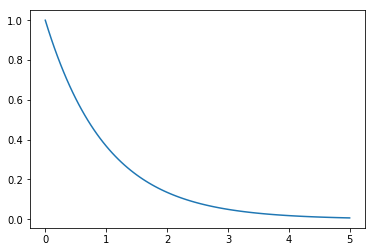

In [9]:
plot(x,sol)

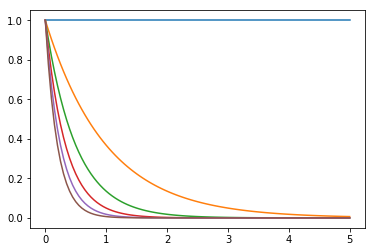

In [10]:
i = 0
while i <= 5:
    #x = linspace(0, 5, 100)
    resultado =exps(i,x)
    plot(x,resultado)
    i +=1

* **Comente el código anterior**

Ahora implentemos el método de Euler y el **estudiante debe comentarlo**. Antes generemos el lado derecho de la respectiva ecuación diferencial es decir $f(N) = -\lambda N$

In [11]:
def ff(l,x):
    return -l*x

In [12]:
ff(1,1)

-1

In [13]:
def metodo_euler(f, intervalo, t0, condini, n):
    x = linspace(intervalo[0], intervalo[1], n)
    y = []
    i = 0
    h = (intervalo[1] - intervalo[0])/n
    #condt = condini[0]
    #condx = condini[0]
    condx = condini[0]
    while i < n:
        #print condx
        y.append(condx)
        #print y
        condx = condx + f(1,condx)*h
        t0 = t0 + h
        i +=1 
    
    return x,y

In [14]:
xsole, ysole = metodo_euler(ff, (0.,5.), 0.0 , [1.0,], 1000)

Ahora grafiquemos la solución numérica

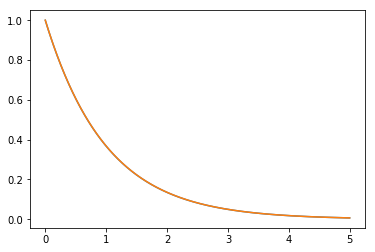

In [15]:
plot(xsole, ysole)
plot(x,sol)

* **Realice un ciclo para que grafique la solución aproximada para distintos valores de $\lambda$**

Ahora escribamos el método de Euler para un sistema de N-dimensional

In [16]:
def metodo_euler2(f, t0, tf, condini, dt):
    t = []
    x = [] 
    
    h = dt 
    x.append(condini)
    t.append(t0)
    while t0 < tf:
        condini = array(condini) + array(f(1,condini))*h
        t0 = t0 + h
        x.append(list(condini))
        t.append(t0) 
    
    return t, array(x)

Probemos este método para el oscilador armónico

In [17]:
def oscilador(para,x):
    return [x[1],-(para**2)*(x[0])]

oscilador(1,[1.0,0.0])

[0.0, -1.0]

In [18]:
tiempo, sol = metodo_euler2(oscilador, 0.0 , 100.0,  [1.0, 0.0], .01)

In [19]:
sol

array([[ 1.        ,  0.        ],
       [ 1.        , -0.01      ],
       [ 0.9999    , -0.02      ],
       ...,
       [ 1.4016838 ,  0.86768941],
       [ 1.41036069,  0.85367257],
       [ 1.41889742,  0.83956896]])

In [20]:
sol[:,0]

array([1.        , 1.        , 0.9999    , ..., 1.4016838 , 1.41036069,
       1.41889742])

La gráfica de la solución numérica es la siguiente 

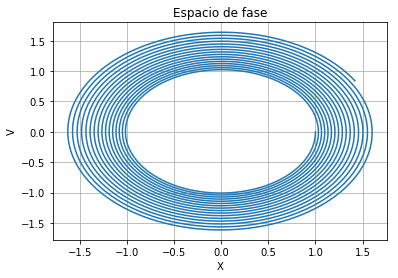

In [21]:
plot(sol[:,0],sol[:,1])
title("Espacio de fase")
xlabel("X")
ylabel("V")
grid(True)
show()

### Vamos a pintar la solución analítica

In [22]:
ta = linspace(0.0 ,10.0,1001)

In [23]:
xa = []
va = []

for i in ta:
    aux = cos(i)
    auxv = -sin(i)
    xa.append(aux)
    va.append(auxv)

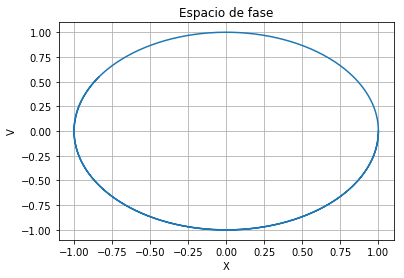

In [24]:
plot(xa,va)
title("Espacio de fase")
xlabel("X")
ylabel("V")
grid(True)
show()

* **Interprete la grafica anterior**

* **Explique que sucede en la siguientes gráficas, con respecto al sistema masa resorte**

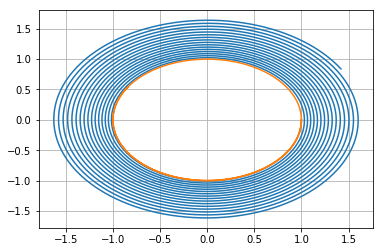

In [25]:
plot(sol[:,0], sol[:,1])
plot(xa,va)
grid(True)

Text(0, 0.5, 'posicion')

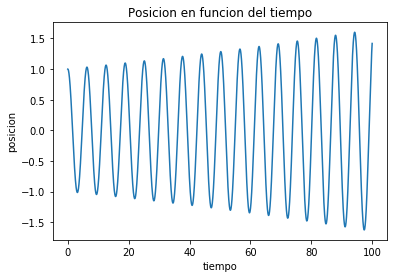

In [26]:
plot(tiempo, sol[:,0])
title("Posicion en funcion del tiempo")
xlabel("tiempo")
ylabel("posicion")

Text(0, 0.5, 'velocidad')

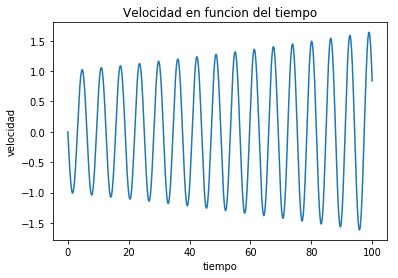

In [27]:
plot(tiempo, sol[:,1])
title("Velocidad en funcion del tiempo")
xlabel("tiempo")
ylabel("velocidad")

### Existe una mejora para el metodo de Euler

A este se le conoce como método mejorado de Euler o de Heun y la regla de iteración es:

$$x_{n+1} = x_{n} + \dfrac{f(t_{n}, x_{n}) + f(t_n + h, x_{n} + hf(t_n,x_n))}{2}h$$ Donde $t_{n+1} = t_{n} + h$

Implemente el anterior método de integración y comparare con el método de Euler, para el oscilador armónico. En este caso si $f(t,x)$ sólo depende de t y no de $y$, entonces la ecuación diferencial $\dot{x} = f(t,x)$ se  reduce a resolver  $f(t)$, en este caso se obtiene la fómula del trapecio $$x_{n+1}= x_{n} + \dfrac{h}{2}\left[f(t_{n}) + f(t_n +h))\right]$$

* **Escriba el método de Euler mejorado en N dimesiones, más adelante lo haremos para el método de Runge-Kutta**

## Metodo de Runge-Kutta

Al igual que el método de Euler solo daremos el algoritmo del método de Runge-Kutta, aunque sería muy importante que el estudiante revise algun momento la descripción formal del método

Para el problema de valores iniales esto es $\dfrac{d x(t) }{dt} = f(t,x,\lambda)$ con condición inicial $x(0) = x_0$

La recurrencia para el método es la siguiete: 


$$
\begin{eqnarray}
x_{n+1} = x_{n} + \frac{h}{6}\left( K_{1} + 2K_{2} + 2K_{3} + K_{4} \right) \\
t_{n+1} = t_{n} + h 
\end{eqnarray}
$$ 

y

$$
\begin{eqnarray}
K_{1} = f\left( t_n, x_n, \lambda \right)  \\
K_{2} = f\left( t_n + \frac{h}{2}, x_n + h\frac{K_1}{2}, \lambda \right)  \\ 
K_{3} = f\left( t_n + \frac{h}{2}, x_n + h\frac{K_2}{2}, \lambda\right)  \\
K_{4} = f\left( t_n + h, x_n + hK_3, \lambda\right) 
\end{eqnarray}
$$ 

In [28]:
def rg4(f, t0, tf, condi, dt, para):
    tiempo = []
    xsalida = []
    h = dt
    t = t0
    x = array(condi)
    while t < tf:
        
        tiempo.append(t)
        xsalida.append(list(x))
        
        k1 = array(f(x,t,para))
        k2 = array(f(x + h*k1*0.5, t + h*0.5, para))
        k3 = array(f(x + h*k2*0.5, t + h*0.5, para))
        k4 = array(f(x + h*k3, t + h, para))
        
        x = x + h*(1/6.)*(k1 + 2*k2 + 2*k3 + k4)
        t = t + h
    return tiempo, array(xsalida)
        
        

In [29]:
def oscilador(x,t,para):
    return [x[1],-(para**2)*(x[0])]


* **Comente el código anterior y explique que hace `array()`**

In [30]:
time, out, = rg4(oscilador, 0.0, 128, [2.0, 0.0], 0.01, 1.0)

In [31]:
out

array([[ 2.        ,  0.        ],
       [ 1.9999    , -0.01999967],
       [ 1.99960001, -0.03999733],
       ...,
       [-1.34191229, -1.48299406],
       [-1.35667489, -1.46950102],
       [-1.37130183, -1.45586102]])

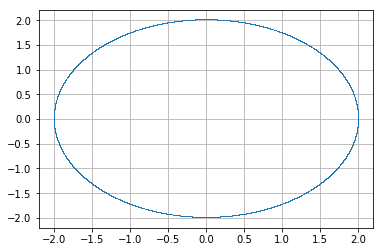

In [32]:
plot(out[:,0],out[:,1], ",")
grid(True)

* **En archivo ```integradores.py``` escriba los tres métodos vistos en este notebook**